# Notebook 2

## Exploração de Dados 2018/2019

### Nelson Costa 42983
### Armando Sousa 76498

## Intro
Notebook 2 only has task C done to dataset 'Banknote Authentication Data Set' 
(https://archive.ics.uci.edu/ml/datasets/banknote+authentication).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
# Load the dataset
df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:2]]

scaler = StandardScaler()
scaler = scaler.fit(X1)
X1 = scaler.transform(X1)


# Task C - Evaluation

## Holdout

In [5]:
from sklearn.metrics import accuracy_score

# get training and test sets
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.3)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp = mlp.fit(X_train,y_train)

#print("MLP accuracy 1 = ",mlp.score(X_test, y_test))  

y_pred = mlp.predict(X_test)
print("MLP accuracy = ",accuracy_score(y_test, y_pred))

svm = SVC(C=1.0,kernel='rbf', tol=1e-05, verbose=0, gamma='auto')
svm = svm.fit(X_train, y_train)

#print("SVM accuracy = ",svm.score(X_test, y_test))  

y_pred = svm.predict(X_test)
print("SVM accuracy = ",accuracy_score(y_test, y_pred))

MLP accuracy =  0.9368932038834952
SVM accuracy =  0.9393203883495146


## Cross Validation

Average difference of -0.000000 with std. dev. of 0.000000.


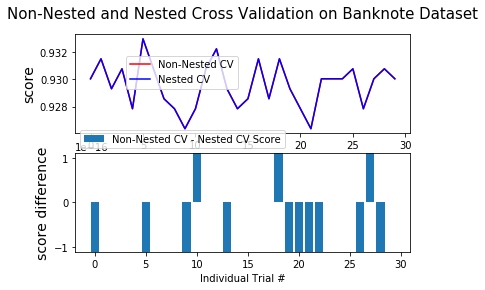

In [6]:
# Number of random trials
NUM_TRIALS = 30

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(C=1.0,kernel='rbf', tol=1e-05, verbose=0)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X1, y1)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X1, y=y1, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Banknote Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()